# Demo

In this notebook we give some random images to our neural network to check if the prediction is correct.

In [1]:
%matplotlib inline
import cv2
import matplotlib
import pylab as plt
import numpy as np
import math
import tensorflow as tf
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers
from models.config import get_default_configuration
from tensorflow.keras.models import load_model

Using TensorFlow backend.


Load the example data

In [2]:
df = pd.read_csv("example_image/example_dataset.csv")

In [3]:
model_3 = Sequential([  
    Dense(32, activation='tanh', 
    kernel_regularizer=regularizers.l2(0.01),
    input_shape=(98,)),
    Dropout(0.3),
    Dense(16, activation='tanh',
    kernel_regularizer=regularizers.l2(0.01)), 
    Dropout(0.3),
    Dense(8,
    activation='tanh',
    kernel_regularizer=regularizers.l2(0.01)),    
    Dropout(0.3),    
    Dense(1, activation='sigmoid', 
    kernel_regularizer=regularizers.l2(0.01)),])

In [4]:
model_3.compile(optimizer='adam',      
                loss='binary_crossentropy',    
                metrics=['accuracy'])

Load pre-trained weights

In [5]:
model_3.load_weights('models/model_NN.h5')

In [6]:
dataset = df.values
X = dataset[:,0:98]

Perform predictions on data

In [7]:
predictions = model_3.predict_classes(X)

## Show Results

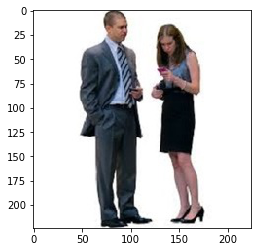

Prediction: Image 1 - Predicted Label: Non Violence


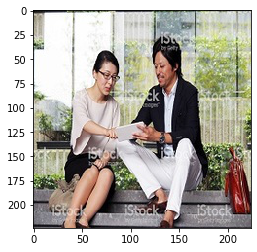

Prediction: Image 2 - Predicted Label: Non Violence


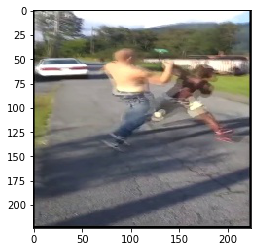

Prediction: Image 3 - Predicted Label: Violence


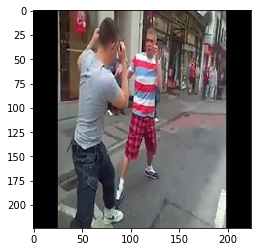

Prediction: Image 4 - Predicted Label: Violence


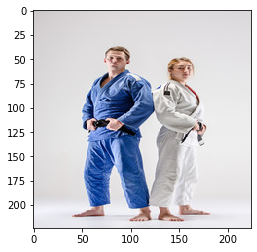

Prediction: Image 5 - Predicted Label: Non Violence


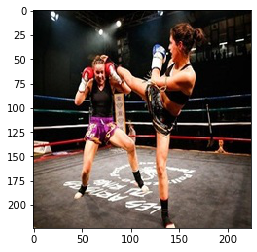

Prediction: Image 6 - Predicted Label: Violence


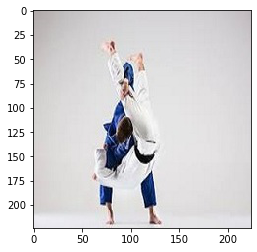

Prediction: Image 7 - Predicted Label: Violence


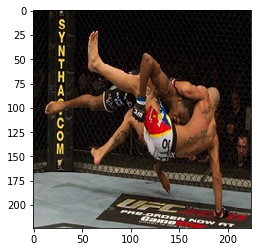

Prediction: Image 8 - Predicted Label: Violence


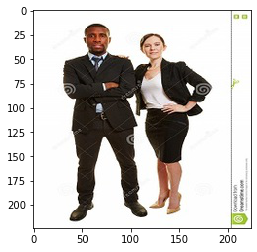

Prediction: Image 9 - Predicted Label: Non Violence


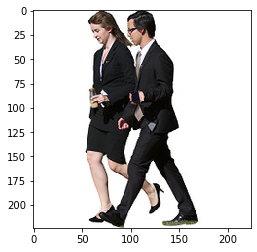

Prediction: Image 10 - Predicted Label: Non Violence


In [8]:
for i in range(10):
    path = "example_image/"+str(i)+".jpg"
    if predictions[i]==1:
        oriImg = cv2.imread(path) 
        plt.imshow(oriImg[:,:,[2,1,0]])
        plt.show()
        print ('\033[1m'+"Prediction:"+'\033[0m'+" Image " +str(i+1)+ " - Predicted Label:" +'\033[1m'+ " Non Violence")
    else: 
        oriImg = cv2.imread(path) 
        plt.imshow(oriImg[:,:,[2,1,0]])
        plt.show()
        print ('\033[1m'+"Prediction:"+'\033[0m'+" Image " +str(i+1)+ " - Predicted Label:" +'\033[1m'+ " Violence")